# 실습 과제2: 벡터화 연산과 브로드캐스팅 이해하기

### 문제 1: 기본 벡터화와 브로드캐스팅 이해하기

x = np.linspace(0, 5, 50)와 y = np.linspace(0, 5, 50)[:, np.newaxis]를 생성하세요. 여기서 x는 (50,)의 1차원 배열이고, y는 [:, np.newaxis]를 사용하여 (50, 1)의 2차원 배열로 변환됩니다.

x와 y의 형태를 출력하여 브로드캐스팅이 어떻게 이루어지는지 확인하세요.

In [1]:
import numpy as np

In [14]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:,np.newaxis]

print("x의 형태:", x.shape)
print("x is \n" , x)
print()
print("y의 형태:", y.shape)
print("y is \n" , y)

x의 형태: (50,)
x is 
 [0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]

y의 형태: (50, 1)
y is 
 [[0.        ]
 [0.10204082]
 [0.20408163]
 [0.30612245]
 [0.40816327]
 [0.51020408]
 [0.6122449 ]
 [0.71428571]
 [0.81632653]
 [0.91836735]
 [1.02040816]
 [1.12244898]
 [1.2244898 ]
 [1.32653061]
 [1.42857143]
 [1.53061224]
 [1.63265306]
 [1.73469388]
 [1.83673469]
 [1.93877551]
 [2.04081633]
 [2.14285714]
 [2.24489796]
 [2.34693878]
 [2.44897959]
 [2.55102041]
 [2.65306122]
 [2.75510204]
 [2.8

### 문제 2: 브로드캐스팅을 활용하여 수식 계산하기
z = np.sin(x) ** 200 + np.cos(300 + y * x) * np.cos(x)를 사용하여 z 배열을 계산하세요.

z 배열의 형태를 출력하고, 브로드캐스팅에 의해 z의 형태가 (50, 50)이 되었는지 확인하세요.


In [15]:
z = np.sin(x) ** 200 + np.cos(300 + y * x) * np.cos(x)

print("z의 형태:", z.shape)
print("z is \n" , z)

z의 형태: (50, 50)
z is 
 [[-0.02209662 -0.02198168 -0.02163806 ...  0.49547289  0.02724053
  -0.00604054]
 [-0.02209662 -0.01162504 -0.00124733 ...  0.53489941  0.11614127
   0.13325184]
 [-0.02209662 -0.00126714  0.01914395 ...  0.56550331  0.18429112
   0.23866154]
 ...
 [-0.02209662  0.44811731  0.80031128 ...  0.42767562 -0.15237784
  -0.26153187]
 [-0.02209662  0.45734059  0.81188813 ...  0.41425119 -0.13819336
  -0.17481867]
 [-0.02209662  0.46651428  0.8231129  ...  0.42032637 -0.08254055
  -0.04351942]]


### 문제 3: 벡터화 연산으로 계산 속도 비교하기
for 반복문을 사용해 z의 각 요소를 수동으로 계산하는 코드를 작성하고, 벡터화 연산으로 구한 z와 같은 결과가 나오는지 확인하세요.

timeit 모듈을 사용하여 반복문을 통한 계산과 벡터화 연산을 각각 수행하는 데 걸리는 시간을 측정하고, 두 연산 방식의 속도 차이를 비교하세요.

In [17]:
def for_cal():

    z2 = np.zeros((50,50))

    for i in range(len(x)) :
        for j in range(len(y)) :
            z2[i, j] = np.sin(x[j]) ** 200 + np.cos(300 + y[i, 0] * x[j]) * np.cos(x[j])

    return z2

In [18]:
%timeit z = np.sin(x) ** 200 + np.cos(300 + y * x) * np.cos(x)

34.3 μs ± 383 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [19]:
%timeit for_cal()

7.26 ms ± 69.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)



### 문제 4: 그래프를 사용해 시각적으로 결과 확인하기
z 값을 시각적으로 이해하기 위해 matplotlib 라이브러리를 사용하여 z의 값을 컬러 맵으로 시각화하세요.

plt.imshow(z, extent=(0, 5, 0, 5), origin='lower', cmap='viridis')와 plt.colorbar()를 사용해 결과를 시각화하고, 그래프의 형태를 확인하세요.

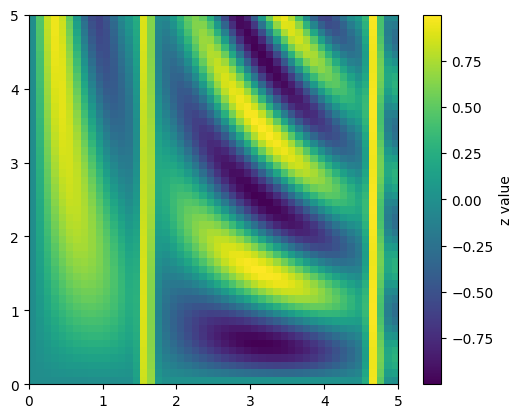

In [20]:
import matplotlib.pyplot as plt

plt.imshow(z, extent=(0, 5, 0, 5), origin='lower', cmap='viridis')
plt.colorbar(label="z value")
plt.show()